<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/NLP_CFindustries_EarningReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### trying to do some of the NLP on an earnings report from CF industries
they own one of the biggest pollution plants in louisiana, problem is the NLP thing we did in class he had some really good data from like 5 years of Earning reports but I dont know how to find that so its not that interesting from one report.

In [2]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

In [3]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [4]:
url = "https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf"



In [6]:
raw = parser.from_file(url)

2025-01-17 07:08:07,344 [MainThread  ] [INFO ]  Retrieving https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf to /tmp/emetcalf-vas-group19_qm2-raw-main-data-cfq3_earnings_report.pdf.
INFO:tika.tika:Retrieving https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf to /tmp/emetcalf-vas-group19_qm2-raw-main-data-cfq3_earnings_report.pdf.


In [7]:
date=raw['metadata']['dcterms:created']
#title=raw['metadata']['dc:title']
raw_text=raw['content']

print('Date: ', date)
#print('Title: ', title)
print('Word Count: ', len(raw_text))
print('Text:')
raw_text

Date:  2025-01-16T20:06:24Z
Word Count:  51208
Text:


"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGood day, ladies and gentlemen, and welcome to CS Industries' first nine months and\nthird\nquarter, 2024.\nAll participants will be in the listen-only mode.\nShould you need assistance, please signal a conference specialist by pressing the \nstar\nkey followed by zero.\nWe will facilitate a question and answer session towards the end of this \npresentation.\nSuppose a question at any time, please press star, then one on your touch-tone \nphone.\nI would now like to turn the presentation over to your host for today, Mr. Martin \nJerozick\nwith CF Investor Relations.\nSir, please proceed.\nGood morning, and thanks for joining the CF Industries Earnings Conference Call.\nWith me today are Tony Will, President and CEO, Chris Bone, Executive Vice \nPresident and\nChief Operating Officer, Bert Frost, Executive Vice President of Sales, Market \nDevelopment\nand Supply Chain, and Greg Cameron, Executive Vice President and Chie

In [23]:
import re
global_warming = re.findall(r'global warming', raw_text, re.IGNORECASE)
environment =  re.findall(r'environment', raw_text, re.IGNORECASE)
climate = re.findall(r'climate', raw_text, re.IGNORECASE)
profit = re.findall(r'profit', raw_text, re.IGNORECASE)
growth = re.findall(r'growth', raw_text, re.IGNORECASE)

print(growth)

['growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth']


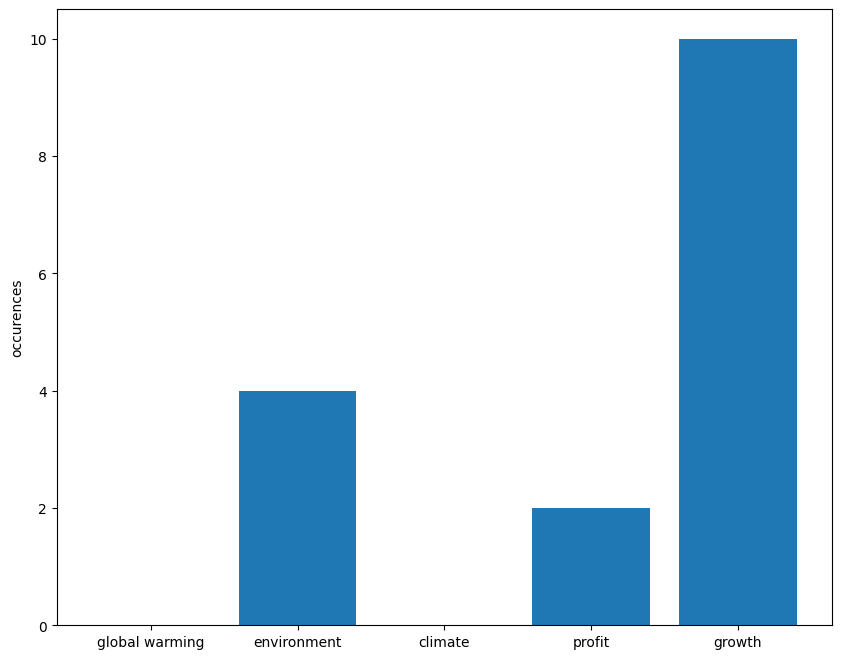

In [25]:

counts = [len(global_warming), len(environment), len(climate), len(profit), len(growth)]
terms = ["global warming", "environment", "climate", "profit", "growth"]

plt.bar(terms, counts)
plt.ylabel("occurences")
#plt.xlabel("words picked")
plt.title("Usage of words in Earnings Report")

plt.show()

In [31]:
environment_sentences=re.findall(r"([^.]*environment[^.]*)"," ".join(raw_text))

print(len(environment_sentences))

for sentence in environment_sentences[:10]:
  print('\n', sentence)

0
